![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [456]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import re
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [457]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [458]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [459]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [460]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [461]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [462]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [463]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [464]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [465]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [466]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [467]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [468]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
6800,id_6800,Stockholm,['Fast Food'],1222.0,$,74.0,"[['Ok and calm', 'Good for a late night snack'...",/Restaurant_Review-g189852-d740156-Reviews-Bur...,d740156,0,0.0
6919,id_6919,London,"['Bar', 'British', 'Pub', 'Vegetarian Friendly']",3182.0,$$ - $$$,40.0,"[['The best pub in the area - a proper local',...",/Restaurant_Review-g186338-d6610454-Reviews-Al...,d6610454,0,0.0
33142,id_5274,Paris,NaN,5275.0,NaN,13.0,"[['Excellent food, great value', 'Good food'],...",/Restaurant_Review-g187147-d8730827-Reviews-Le...,d8730827,1,5.0
44432,id_210,Paris,"['French', 'European']",211.0,$$ - $$$,300.0,[['Duck specialists and a very good option fo....,/Restaurant_Review-g187147-d718046-Reviews-Il_...,d718046,1,4.5
35594,id_5110,London,"['Bar', 'British', 'Pub']",5119.0,$$ - $$$,63.0,"[['Quiet Drink on a Saturday', 'Awesome pub'],...",/Restaurant_Review-g186338-d6405157-Reviews-Th...,d6405157,1,4.0


In [469]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [470]:
# Возьмём столбцы Number of Reviews и Price Range
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [471]:
# Заполняем пропуски в Number_of_Reviews медианным значением
data['Number of Reviews'] = data['Number of Reviews'].fillna(data['Number of Reviews'].median())

In [472]:
# Взглянем поближе на столбец 'Cuisine Style':
data['Cuisine Style'].value_counts(dropna=False)

NaN                                                                                                                            11590
['Italian']                                                                                                                     1332
['French']                                                                                                                      1019
['Spanish']                                                                                                                      860
['French', 'European']                                                                                                           503
                                                                                                                               ...  
['Mexican', 'South American', 'Latin', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']                              1
['Asian', 'Chinese', 'Japanese', 'Thai']                             

В этом столбце очень много пропусков. Будем считать, что пропущенные значения - название одной, возможно, непопулярной кухни. Заменим все пропуски на значение 'Other'.
Кроме того, видим, что значения в столбце представляют собой строку со списком кухонь. Надо будет разделить эти списки и взглянуть повнимательнее на получившиеся значения. Может быть, сможем извлечь из них что-нибудь интересное.

In [473]:
# Заменяем все пропуски на значение 'Other':
data['Cuisine Style'] = data['Cuisine Style'].fillna('Other')
data[['Cuisine Style']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Cuisine Style    50000 non-null object
dtypes: object(1)
memory usage: 390.8+ KB


In [474]:
# Следующий столбец с пропусками - 'Price Range'. Посмотрим, какие значения содержатся в нём:
data['Price Range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: Price Range, dtype: int64

Видим, что значений содержатся всего три. При этом довольно много пропусков. Заменим значения в столбце на числа 0-3. Если добавим пропуски к какому-то ценовому диапазону, может выйти сильный перекос. Поэтому заменим пропуски на отдельное число.
Так как диапазон цен можно поставить по возрастанию, признак не категориальный и можно просто поставить числа по возрастанию.

In [475]:
# Создадим словарь для замены, по которому в следующей главе закодируем данный признак:
price_range_replace = {np.nan: 0, '$': 1, '$$ - $$$': 2, '$$$$': 3}
# Заменяем значения
data['Price Range'] = data['Price Range'].replace(to_replace=price_range_replace)

In [476]:
# Взглянем на последний столбец с пропусками 'Reviews':
data[['Reviews']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Reviews    49998 non-null object
dtypes: object(1)
memory usage: 390.8+ KB


In [477]:
data['Reviews'].value_counts()

[[], []]                                                                                                         8112
[['The real codido madrileño'], ['03/31/2017']]                                                                     2
[['Nice restaurant in Madrid', 'Highly reccomended'], ['11/10/2017', '05/21/2017']]                                 2
[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]                             2
[['Good Paella', 'Good enough. Nothing more'], ['09/20/2017', '05/29/2017']]                                        2
                                                                                                                 ... 
[['gone but never forgotten', 'Finally a decent brunch in London'], ['05/07/2017', '08/23/2016']]                   1
[['Well worth searching out', 'Cozy tapas restaurant'], ['11/05/2017', '08/16/2017']]                               1
[['Take away delight', 'Best chinese in southwoodford'],

Столбец содержит всего два пропуска. Он содержит строки, содержащие отзывы и даты отзывов. Дальше мы будем вытаскивать даты из этого столбца и создавать на их основе новый признак. Поэтому заполним пропуски строкой с какой-то одной произвольной датой

In [478]:
data['Reviews'] = data['Reviews'].fillna('11/11/1111')

In [479]:
# Посмотрим на информацию по итоговой таблице. Не пропустили ли чего.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
dtypes: float64(3), int64(2), object(6), uint8(2)
memory usage: 4.3+ MB


Все пропуски заполнены, переходим к обработке признаков и созданию новых.

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [480]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1573
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Price Range_isNAN              2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

### Посмотрим на столбец City

In [481]:
# Столбец 'City' имеет тип object. Посмотрим, можно ли вытащить из него пользу для модели. Посмотрим, какие в нём значения
data['City'].value_counts(dropna=False)

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: City, dtype: int64

Значений немного. Названия городов, закодированные тем или иным способом, не дали уменьшения ошибки. Но, как мы видим, количество ресторанов в каждом городе очень сильно отличается. Поэтому создадим признак, показывающий, сколько ресторанов в денном городе.

In [482]:
count_in_city = data['City'].value_counts(dropna=False)
data['rest_count'] = data['City'].apply(lambda name: count_in_city[name])

In [483]:
# Теперь закодируем столбец City с помощью One-Hot Encoding
# Сам столбец нам пригодится дальше, поэтому сделаем его копию
data['City_copy'] = data['City']
data = pd.get_dummies(data, columns=['City'])

Внимательно поссмотрим на столбец 'Ranking'.

Судя по описанию, это ранг ресторана относительно других ресторанов в этом городе.
Но одно дело, когда ресторан занимает 200 место в Любляне, а совсем другое дело - 200 место в Лондоне.
Поэтому добавим два новых признака: 
1) Ranking_norm - ранг ресторана, нормированный на максимальное количество ресторанов в одном городе (в данном случае 7193 в Лондоне).

2) Ranking_mean - Ранг ресторана, нормированный на среднее значение рейтинга для данного города

In [484]:
# Нормированный максимальное количество ресторанов ранг ресторана:
data['Ranking_norm'] = data['Ranking'] * count_in_city.max() / data['rest_count']

In [485]:
# Посмотрим на средний ранг ресторанов по городам
city_mean_rank = data.groupby('City_copy')['Ranking'].mean()
city_mean_rank

City_copy
Amsterdam     1591.589650
Athens         880.213918
Barcelona     3879.422680
Berlin        3255.417745
Bratislava     462.428947
Brussels      1541.901826
Budapest      1219.061704
Copenhagen     982.147741
Dublin         972.127990
Edinburgh      885.130201
Geneva         713.227119
Hamburg       1375.409781
Helsinki       564.231579
Krakow         616.267148
Lisbon        1867.330298
Ljubljana      234.509009
London        8169.707354
Luxembourg     308.159696
Lyon          1303.902309
Madrid        4388.516391
Milan         3106.027840
Munich        1370.297817
Oporto         752.034268
Oslo           552.569672
Paris         6938.557138
Prague        2086.979626
Rome          2970.733102
Stockholm     1237.482091
Vienna        1711.275814
Warsaw        1055.193514
Zurich         794.280292
Name: Ranking, dtype: float64

Среднее значение в зависимости от города сильно отличается. Из-за того, что в городах разное количество ресторанов. Можно привести этот столбец примерно к одному масштабу. Это сделаем чуть позже.

In [486]:
# Высчитаем коэффициент для приведения среднего ранга ресторана в зависимости от города

city_mean_rank = city_mean_rank.max() / city_mean_rank
city_mean_rank

City_copy
Amsterdam      5.133049
Athens         9.281502
Barcelona      2.105908
Berlin         2.509573
Bratislava    17.666946
Brussels       5.298461
Budapest       6.701636
Copenhagen     8.318206
Dublin         8.403942
Edinburgh      9.229950
Geneva        11.454566
Hamburg        5.939835
Helsinki      14.479351
Krakow        13.256763
Lisbon         4.375074
Ljubljana     34.837499
London         1.000000
Luxembourg    26.511278
Lyon           6.265582
Madrid         1.861610
Milan          2.630275
Munich         5.961994
Oporto        10.863478
Oslo          14.784936
Paris          1.177436
Prague         3.914608
Rome           2.750064
Stockholm      6.601879
Vienna         4.774045
Warsaw         7.742378
Zurich        10.285673
Name: Ranking, dtype: float64

In [487]:
# Теперь создадим ранг, нормированный по среднему значению
data['Ranking_mean'] = data.apply(lambda x: x.Ranking * city_mean_rank[x.City_copy], axis = 1)

In [488]:
# Столбец City_copy больше не нужен. удаляем его
data = data.drop(['City_copy'], axis=1)

Теперь разберёмся со столбцом 'Cuisine Style'.

Как мы помним, значения в нём представлены одной строкой.

In [489]:
# Делаем из одной строки список по разделителю - запятой
data['Cuisine Style'] = data['Cuisine Style'].str.split(',')

In [490]:
# Добавляем новый признак - количество кухонь в каждом ресторане. Параметр other, которым мы заменили пропуски, будем считать за одну кухню.
data['Cuisine_count'] = data['Cuisine Style'].apply(lambda t: 1 if t == 'Other' else len(t))

In [491]:
# Разделяем строки таблицы на отдельные кухни. Чтобы не увеличивать количество строк в итоговой таблице, сделаем копию таблицы
data_1 = data.explode('Cuisine Style')

# Приводим названия всех кухонь к единому виду
data_1['Cuisine Style'] = data_1['Cuisine Style'].apply(lambda s: s.strip("[ ]'"))
data_1['Cuisine Style'] = data_1['Cuisine Style'].apply(lambda st: st.lower())

# Смотрим, какие кухни кухни встречаются чаще всего
cus_style = data_1['Cuisine Style'].value_counts()
cus_style

vegetarian friendly    14021
european               12561
other                  11590
mediterranean           7820
italian                 7433
                       ...  
polynesian                 2
salvadoran                 1
xinjiang                   1
burmese                    1
latvian                    1
Name: Cuisine Style, Length: 126, dtype: int64

In [492]:
# Создаём новый признак - Cus_popularity - показатель популярность кухонь ресторана.
# Для этого для каждого ресторана заменяем название каждой кухни на число, показывающее, сколько раз данная кухня встречается в таблице
data_1['Cus_popularity'] = data_1['Cuisine Style'].apply(lambda w: cus_style[w])
data['Cus_popularity'] = 0
# Суммируем все числа для всех кухонь каждого ресторана и делим на количество кухонь в ресторане
for i in data.index:
    data.loc[i, 'Cus_popularity'] = data_1.loc[i, 'Cus_popularity'].sum() / data.loc[i, 'Cuisine_count']

data.head(10)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,Ranking_norm,Ranking_mean,Cuisine_count,Cus_popularity
0,id_0,"[['Bar', 'Pub']]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,0,0,15265.694008,15263.103600,2,3576.000000
1,id_1,"[['European', 'Scandinavian', 'Gluten Free O...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,1605.174737,1534.811258,5,7580.000000
2,id_2,[['Vegetarian Friendly']],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,7820.577181,7476.259365,1,14021.000000
3,id_3,"[['Italian', 'Mediterranean', 'European', '...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,1669.000000,1669.000000,5,9404.000000
4,id_4,"[['Italian', 'Mediterranean', 'European', '...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,700.371053,653.677011,6,8149.666667
5,id_5,"[['French', 'Cafe', 'Fast Food']]",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,...,0,0,0,0,0,0,5997.699574,5996.681836,3,2991.666667
6,id_6,"[['European', 'Portuguese']]",3704.0,1,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0,...,0,0,0,0,0,0,16176.607165,16205.272351,2,6973.000000
7,id_7,[Other],2330.0,0,33.0,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,...,0,0,0,0,0,0,16414.975514,15614.811022,1,11590.000000
8,id_8,"[['European', 'Scandinavian']]",771.0,0,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,...,0,0,0,0,0,0,11675.374737,11163.580000,2,6505.000000
9,id_9,[['Italian']],605.0,0,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0,...,0,0,1,0,0,0,4212.744434,3994.136954,1,7433.000000


In [493]:
# Взглянем на то, какие данные содержит столбец Restaurant_id
data['Restaurant_id'].value_counts()

id_871      19
id_227      19
id_633      19
id_436      19
id_344      18
            ..
id_7926      1
id_11421     1
id_14600     1
id_10336     1
id_14452     1
Name: Restaurant_id, Length: 13094, dtype: int64

In [494]:
# Некоторые id ресторанов повторяются. Судя по описанию, это сети ресторанов.Может быть, в сетях лучше следят за качеством.
# Сделаем из этого признак, просто убрав id_ из названия и превратив это в число
data['chain'] = data['Restaurant_id'].apply(lambda a: float(a.strip("id_")))

In [495]:
# Сделаем такую же замену в столбце ID_TA. Может, это нам что-то даст
data['ID_TA'] = data['ID_TA'].apply(lambda b: int(b.strip("d ")))

In [496]:
# Создадим ещё два новых признака как комбинацию старых
data['uno_mean'] = data['ID_TA'] / data['Ranking_mean']
data['uno_norm'] = data['ID_TA'] / data['Ranking_norm']

# Перенести сюда признак времени ревьюх

In [497]:
# Вспомним, в каком виде представлены данные в столбце Reviews:
data['Reviews'].value_counts()

[[], []]                                                                                                         8112
[['Great Food! Wide Variety.', 'Dinner'], ['11/26/2017', '05/23/2017']]                                             2
[['Simply Excellent!', 'Modern!'], ['10/22/2017', '08/29/2017']]                                                    2
11/11/1111                                                                                                          2
[['Thursday snack', 'Good value for money & good food!'], ['03/13/2017', '06/20/2016']]                             2
                                                                                                                 ... 
[['gone but never forgotten', 'Finally a decent brunch in London'], ['05/07/2017', '08/23/2016']]                   1
[['Well worth searching out', 'Cozy tapas restaurant'], ['11/05/2017', '08/16/2017']]                               1
[['Take away delight', 'Best chinese in southwoodford'],

Столбец содержит несколько отзывов и даты отзывов. Можно проанализировать, насколько негативны или позитивны сами отзывы, но для этого нет нужных знаний. Поэтому просто вытащим из этого столбца разницу между датами отзывов. Возможно, это что-то даст нашей модели.

In [498]:
# Функция, принимающая на вход список и определяющая, есть ли в нём даты. Если есть, возвращает список дат. Если нет, возвращает список с датой 11/11/1111.
def rev_dates(list_review):
    # Выходной список с датами
    date_out = []
    
    for j in list_review:
        # Определяем, есть ли во входном списке дата, подходящая под шаблон
        date = re.match(r'\d{2}\/\d{2}\/\d{4}', j)
        # Если есть, добавляем её к выходному списку
        if date:
            date = date.group()
            date_out.append(dt.datetime.strptime(date, '%m/%d/%Y'))
            
    # Если выходной список пустой, записываем туда дату для заполнения пропусков
    if not date_out:
        return [dt.datetime.strptime('11/11/1111', '%m/%d/%Y')]
    else:
        return date_out


In [499]:
# Теперь очищаем столбец Reviews от лишних символов, делаем из строки список и вытаскиваем оттуда даты
data['Reviews'] = data['Reviews'].str.translate({ord(symb): None for symb in "[]' "})
data['Reviews'] = data['Reviews'].str.split(',')
data['Reviews'] = data['Reviews'].apply(rev_dates)

# Записываем в этот же столбец разницу в днях между первым и последним отзывом
data['Reviews'] = data['Reviews'].apply(lambda sr: (max(sr) - min(sr)).days)

In [500]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
Restaurant_id              50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null int64
URL_TA                     50000 non-null object
ID_TA                      50000 non-null int64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
rest_count                 50000 non-null int64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels     

In [501]:
# И, наконец, удалим все столбцы, содержащие нечисловые данные
data = data.drop(['Restaurant_id','Cuisine Style', 'URL_TA'], axis=1)

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

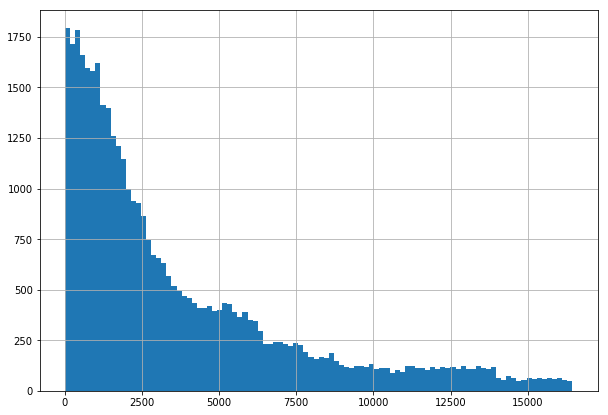

In [502]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

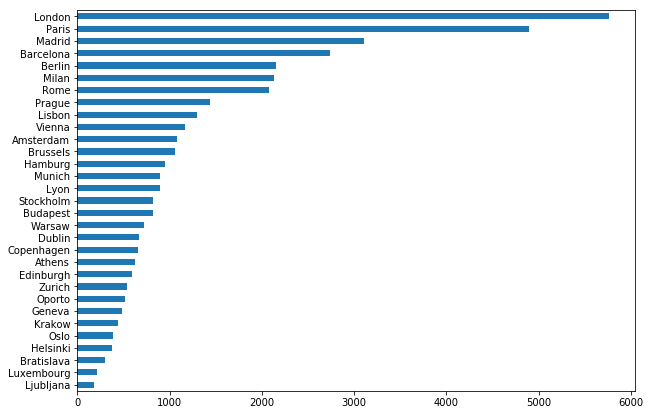

In [503]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

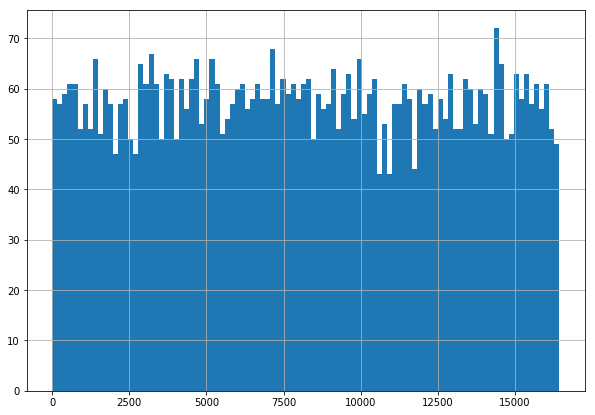

In [504]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

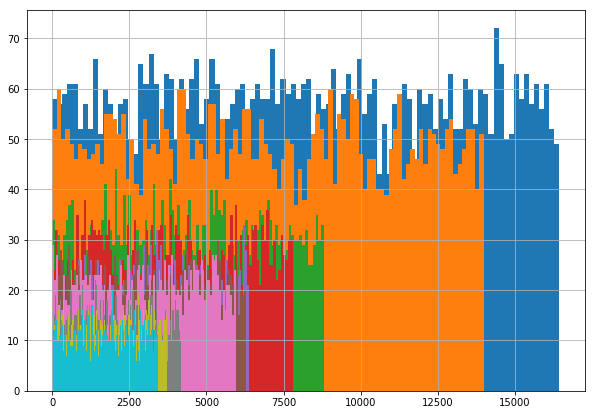

In [505]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

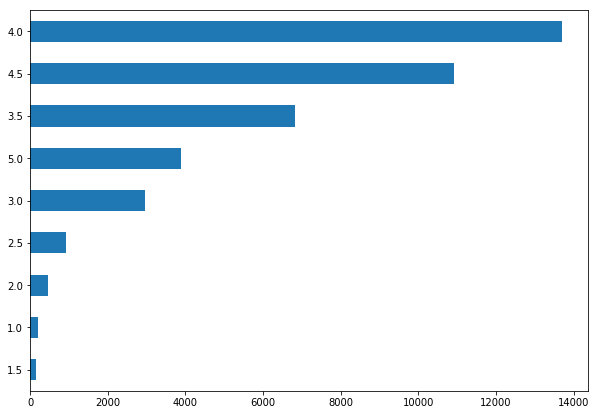

In [506]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

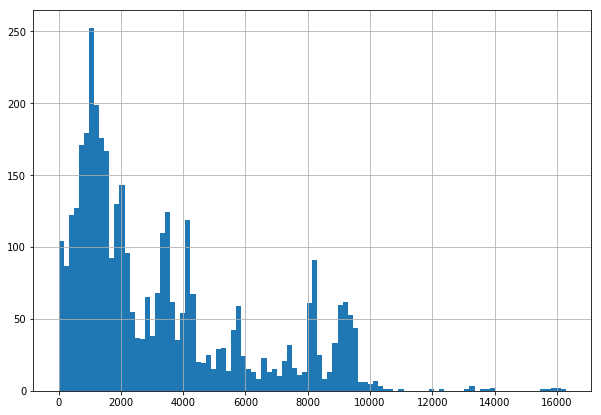

In [507]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

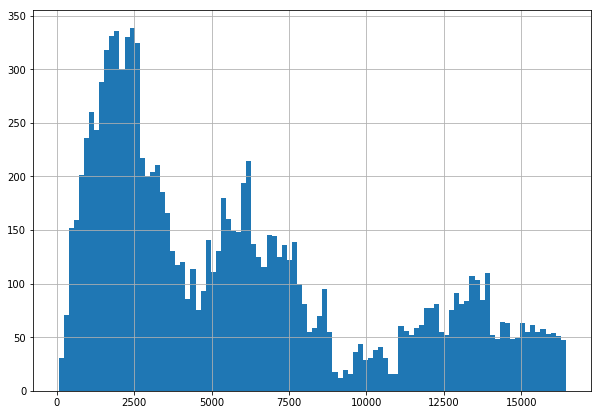

In [508]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

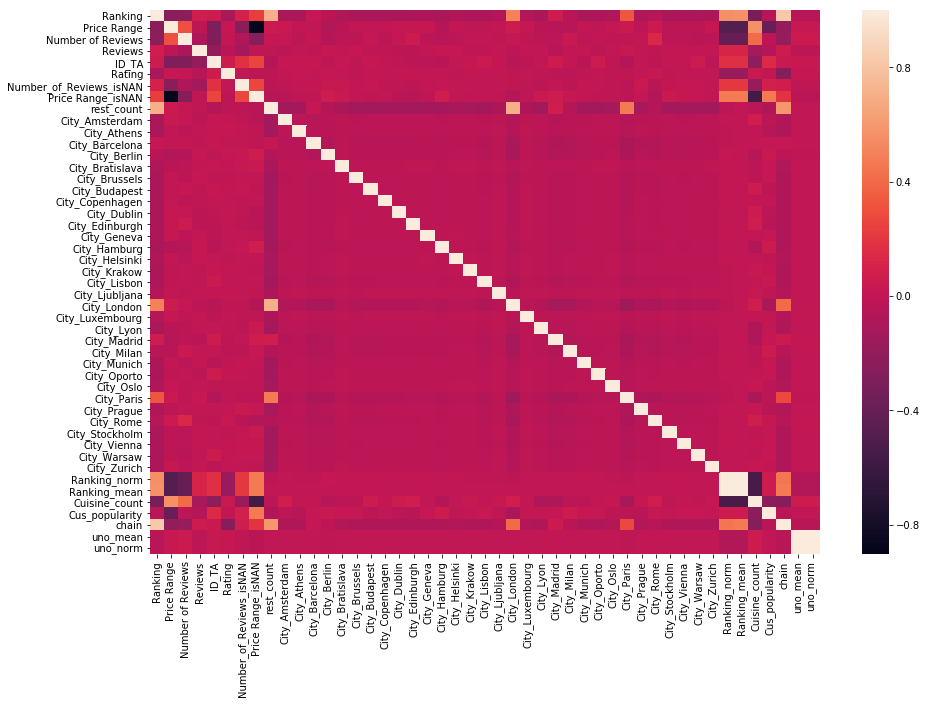

In [509]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

#### Запускаем и проверяем что получилось

In [510]:
data.head(10)

,Ranking,Price Range,Number of Reviews,Reviews,ID_TA,sample,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,rest_count,...,City_Vienna,City_Warsaw,City_Zurich,Ranking_norm,Ranking_mean,Cuisine_count,Cus_popularity,chain,uno_mean,uno_norm
0,12963.0,2,4.0,0,10746918,0,0.0,0,0,6108,...,0,0,0,15265.694008,15263.103600,2,3576.000000,0.0,704.110925,703.991446
1,106.0,2,97.0,37,6674944,0,0.0,0,0,475,...,0,0,0,1605.174737,1534.811258,5,7580.000000,1.0,4349.032472,4158.390888
2,810.0,2,28.0,22,13129638,0,0.0,0,0,745,...,0,0,0,7820.577181,7476.259365,1,14021.000000,2.0,1756.177436,1678.857928
3,1669.0,3,202.0,14,680417,0,0.0,0,0,7193,...,0,0,0,1669.000000,1669.000000,5,9404.000000,3.0,407.679449,407.679449
4,37.0,3,162.0,15,1112354,0,0.0,0,0,380,...,0,0,0,700.371053,653.677011,6,8149.666667,4.0,1701.687502,1588.235259
5,5093.0,1,24.0,5,8458643,0,0.0,0,0,6108,...,0,0,0,5997.699574,5996.681836,3,2991.666667,5.0,1410.553908,1410.314554
6,3704.0,1,2.0,0,8758873,0,0.0,0,0,1647,...,0,0,0,16176.607165,16205.272351,2,6973.000000,6.0,540.495267,541.453032
7,2330.0,0,33.0,0,8286886,0,0.0,1,1,1021,...,0,0,0,16414.975514,15614.811022,1,11590.000000,7.0,530.706775,504.836939
8,771.0,0,2.0,88,12947542,0,0.0,0,1,475,...,0,0,0,11675.374737,11163.580000,2,6505.000000,8.0,1159.801963,1108.961579
9,605.0,0,13.0,34,12716384,0,0.0,0,1,1033,...,0,0,0,4212.744434,3994.136954,1,7433.000000,9.0,3183.762637,3018.551018


In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 48 columns):
Ranking                    50000 non-null float64
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null int64
ID_TA                      50000 non-null int64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
rest_count                 50000 non-null int64
City_Amsterdam             50000 non-null uint8
City_Athens                50000 non-null uint8
City_Barcelona             50000 non-null uint8
City_Berlin                50000 non-null uint8
City_Bratislava            50000 non-null uint8
City_Brussels              50000 non-null uint8
City_Budapest              50000 non-null uint8
City_Copenhagen            50000 non-null uint8
City_Dublin          

In [512]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [513]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [514]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 47), (40000, 47), (40000, 46), (32000, 46), (8000, 46))

# Model 
Сам ML

In [515]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [516]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [517]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [518]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20489875000000002


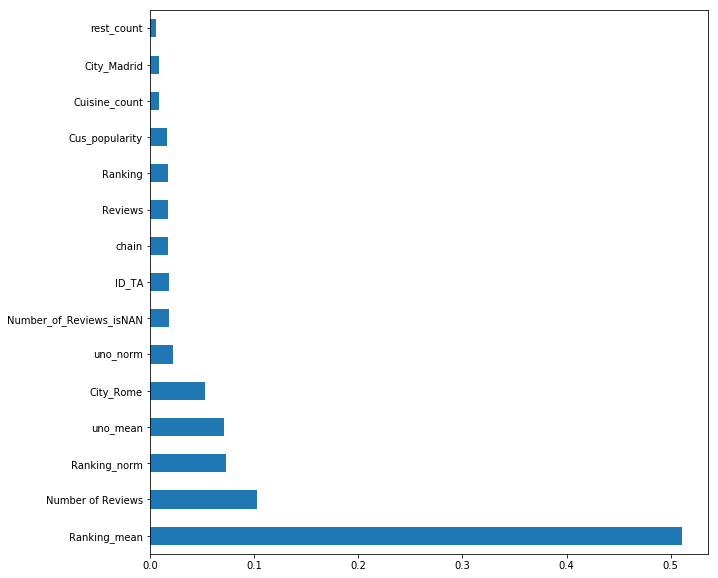

In [519]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [520]:
test_data.head(10)

,Ranking,Price Range,Number of Reviews,Reviews,ID_TA,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,rest_count,City_Amsterdam,...,City_Vienna,City_Warsaw,City_Zurich,Ranking_norm,Ranking_mean,Cuisine_count,Cus_popularity,chain,uno_mean,uno_norm
0,12963.0,2,4.0,0,10746918,0.0,0,0,6108,0,...,0,0,0,15265.694008,15263.103600,2,3576.000000,0.0,704.110925,703.991446
1,106.0,2,97.0,37,6674944,0.0,0,0,475,0,...,0,0,0,1605.174737,1534.811258,5,7580.000000,1.0,4349.032472,4158.390888
2,810.0,2,28.0,22,13129638,0.0,0,0,745,0,...,0,0,0,7820.577181,7476.259365,1,14021.000000,2.0,1756.177436,1678.857928
3,1669.0,3,202.0,14,680417,0.0,0,0,7193,0,...,0,0,0,1669.000000,1669.000000,5,9404.000000,3.0,407.679449,407.679449
4,37.0,3,162.0,15,1112354,0.0,0,0,380,0,...,0,0,0,700.371053,653.677011,6,8149.666667,4.0,1701.687502,1588.235259
5,5093.0,1,24.0,5,8458643,0.0,0,0,6108,0,...,0,0,0,5997.699574,5996.681836,3,2991.666667,5.0,1410.553908,1410.314554
6,3704.0,1,2.0,0,8758873,0.0,0,0,1647,0,...,0,0,0,16176.607165,16205.272351,2,6973.000000,6.0,540.495267,541.453032
7,2330.0,0,33.0,0,8286886,0.0,1,1,1021,0,...,0,0,0,16414.975514,15614.811022,1,11590.000000,7.0,530.706775,504.836939
8,771.0,0,2.0,88,12947542,0.0,0,1,475,0,...,0,0,0,11675.374737,11163.580000,2,6505.000000,8.0,1159.801963,1108.961579
9,605.0,0,13.0,34,12716384,0.0,0,1,1033,0,...,0,0,0,4212.744434,3994.136954,1,7433.000000,9.0,3183.762637,3018.551018


In [521]:
test_data = test_data.drop(['Rating'], axis=1)

In [522]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [523]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [524]:
predict_submission

array([3.315, 4.35 , 4.21 , ..., 3.075, 4.465, 4.14 ])

In [525]:
# Сделаем округление результатов с точностью 0,5 балла
def post_proc(rate):
    if rate <= 1.25:
        rate = 1
    elif 1.25 < rate <= 1.75:
        rate = 1.5
    elif 1.75 < rate <= 2.25:
        rate = 2
    elif 2.25 < rate <= 2.75:
        rate = 2.5
    elif 2.75 < rate <= 3.25:
        rate = 3
    elif 3.25 < rate <= 3.75:
        rate = 3.5
    elif 3.75 < rate <= 4.25:
        rate = 4
    elif 4.25 < rate <= 4.75:
        rate = 4.5
    else:
        rate = 5
    
    return rate

In [526]:
sample_submission['Rating'] = predict_submission
sample_submission['Rating'] = sample_submission['Rating'].apply(post_proc)
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.5
1,id_1,4.5
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
